#### reference https://www.kaggle.com/code/yasirakyzl/covid-19-ml-model-90-accuracy

# Overview Dataset

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [98]:
# 데이터 불러오기

df = pd.read_csv("Covid Data.csv")
print(df.shape)
df.head()

(1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [99]:
# 데이터 정보 확인하기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [100]:
# 누락된 데이터의 갯수를 확인한다.
df.isna().sum().sum()

0

In [101]:
# 각 데이터가 가지는 종류의 수 출력하기
# ex) sex -> 2, 성별이 두개이다.

for i in df.columns:
    print(i,"=>\t", df[i].nunique())

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [102]:
# 각 날짜의 죽은 사람 수 확인하기

df.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [103]:
# 폐렴 환자 수
# 2, 1, 99 폐렴의 종류(?)인듯 하다

df.PNEUMONIA.value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

# Data Preprocessing

In [104]:
# rid of the missing values or features, "INTUBED(삽관)", "PREGNANT(임신한)", "ICU(중환자실)" 제외
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [105]:
# "9999-99-99"는 아직 생존했다는 뜻
# 생존 데이터랑 사망 데이터로 정리, 1이면 death, 2이면 생존.
df["DEATH"] = [2 if each =="9999-99-99" else 1 for each in df.DATE_DIED]

Text(0.5, 1.0, 'PREGNANCIES - SEX')

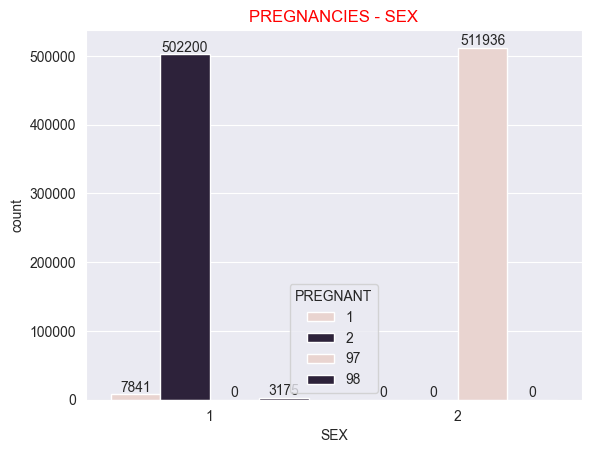

In [106]:
# 잘 모르겠지만.. 성별에 따른 임신 수? 인듯하다
# 성별은 두가지가 있어야 하지만 4가지로 나온다.

ax = sns.countplot(x=df.SEX, hue = df.PREGNANT, palette=sns.cubehelix_palette(2))
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX", color="red")

In [107]:
# Converting process according to inference above
df.PREGNANT = df.PREGNANT.replace(97,2)

# Getting rid of the missing values
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

Text(0.5, 1.0, 'Count of Intubed')

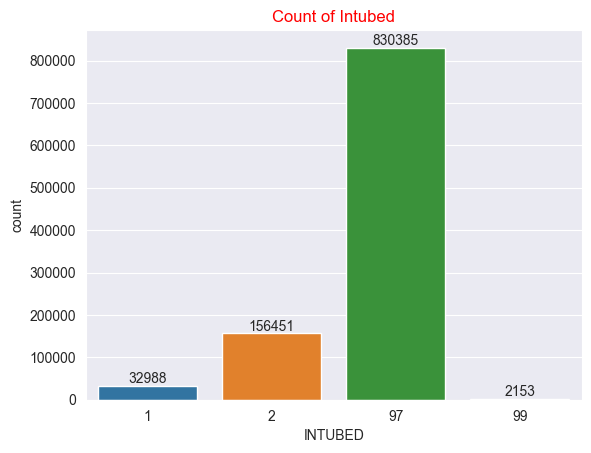

In [108]:
ax = sns.countplot(x= df.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed",color="red")

Text(0.5, 1.0, 'Count of ICU')

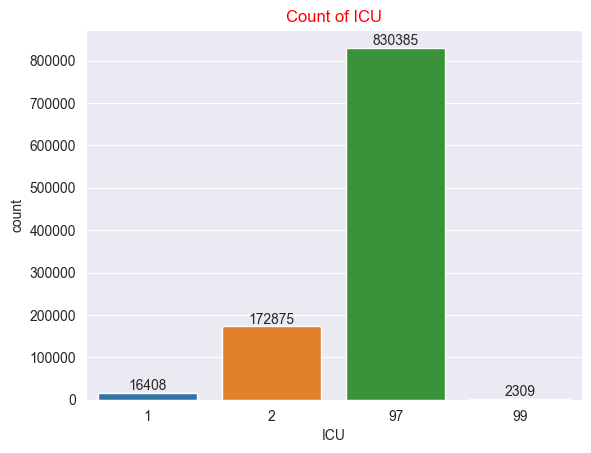

In [109]:
ax = sns.countplot(x=df.ICU)
plt.bar_label(ax.containers[0])
plt.title("Count of ICU",color="red")

In [110]:
# INTUBED, ICU는 너무 많은 데이터가 missing value이기 때문에 그냥 drop한다.
# 또한, 생존, 사망으로 새로 분류했기 때문에 date_died도 필요 없으므로 drop

df.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

In [111]:
# 처리된 데이터를 다시 출력 해본다.

for i in df.columns:
    print(i,"=>\t", df[i].nunique())

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


# Data Visualization

Text(0.5, 1.0, 'Death Distribution')

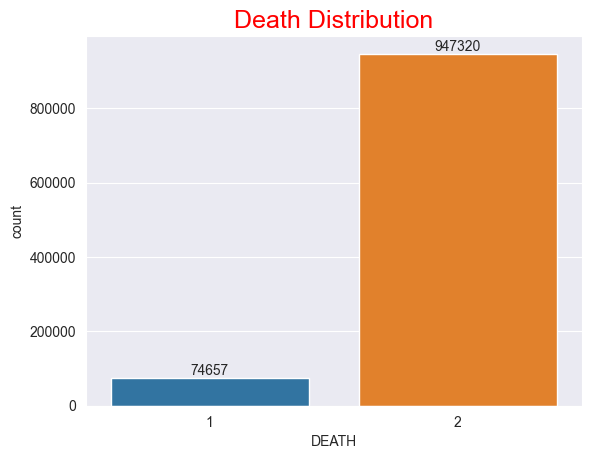

In [112]:
# 1생존, 2사망 수 그래프로 표시하기

ax = sns.countplot(x=df.DEATH)
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18, color="red")

Text(0.5, 1.0, 'Age Distribution')

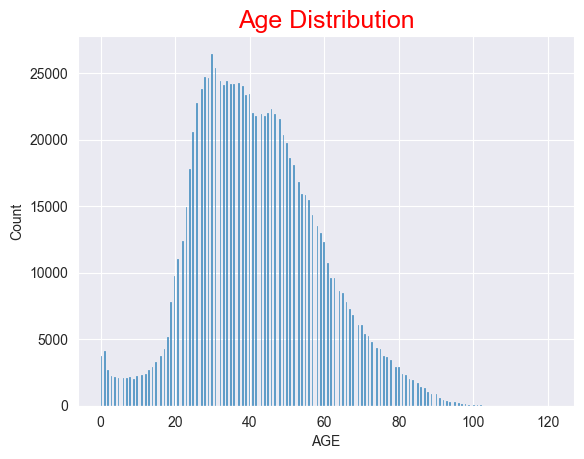

In [113]:
# 나이별 감염수 막대그래프로 표시하기

sns.histplot(x=df.AGE)
plt.title("Age Distribution", color="red", fontsize=18)

Text(0.5, 1.0, 'Age-DEATH')

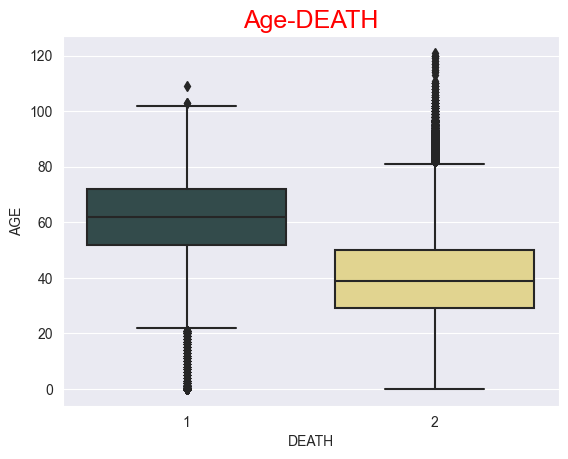

In [114]:
# 나이별 사망 수, 캔들 그래프로 표시하기
# 젊은층이 생존이 많고, 60대의 사망률이 가장 높다

sns.boxplot(x="DEATH", y="AGE", data=df, palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-DEATH", fontsize=18, color="red")

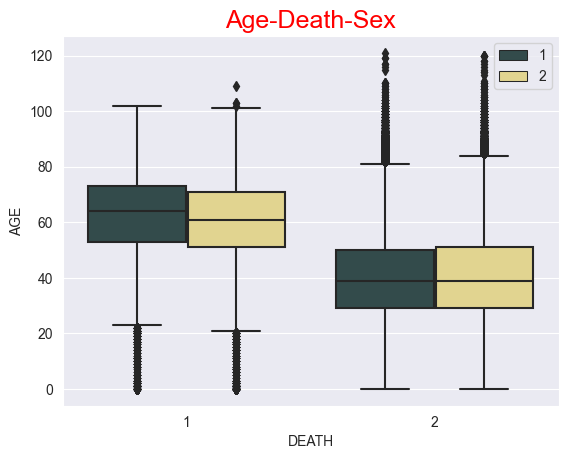

In [115]:
# 나이-성별에 따른 사망 수

sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend(loc="best")

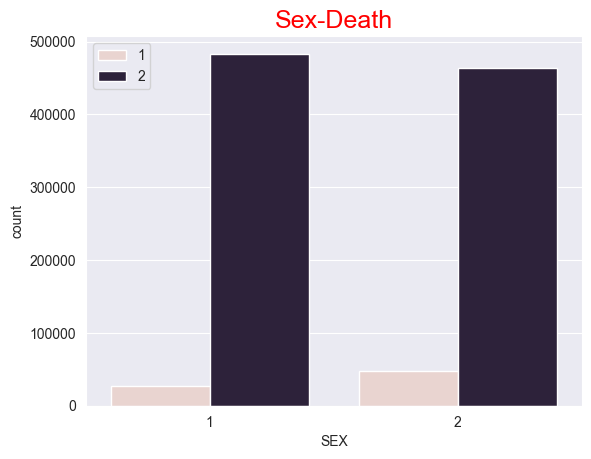

In [116]:
# 성별에 따른 사망 수
# 남성이 조금 더 많이 죽었다.

sns.countplot(x=df.SEX,hue=df.DEATH, palette=sns.cubehelix_palette(2))
plt.title("Sex-Death",fontsize=18, color="red")
plt.legend(loc="best")

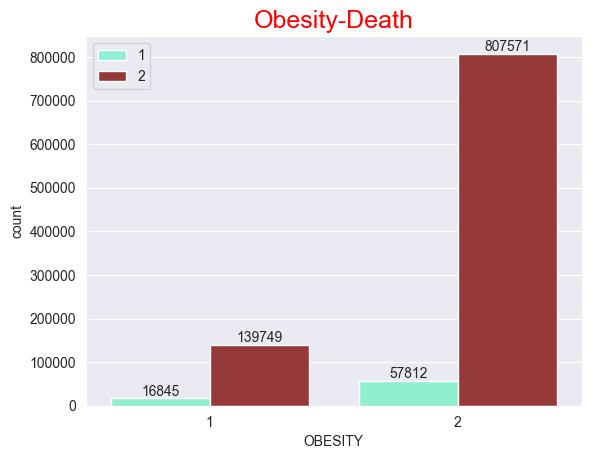

In [117]:
# 비만에 따른 사망 수
# 비만 환자가 더 가능성이 높다.
# Obese patients are more likely to die from covid compare to non-obese patients.

ax=sns.countplot(x=df.OBESITY,hue=df.DEATH, palette=sns.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Obesity-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best")

Text(0.5, 1.0, 'Correlation Between Features')

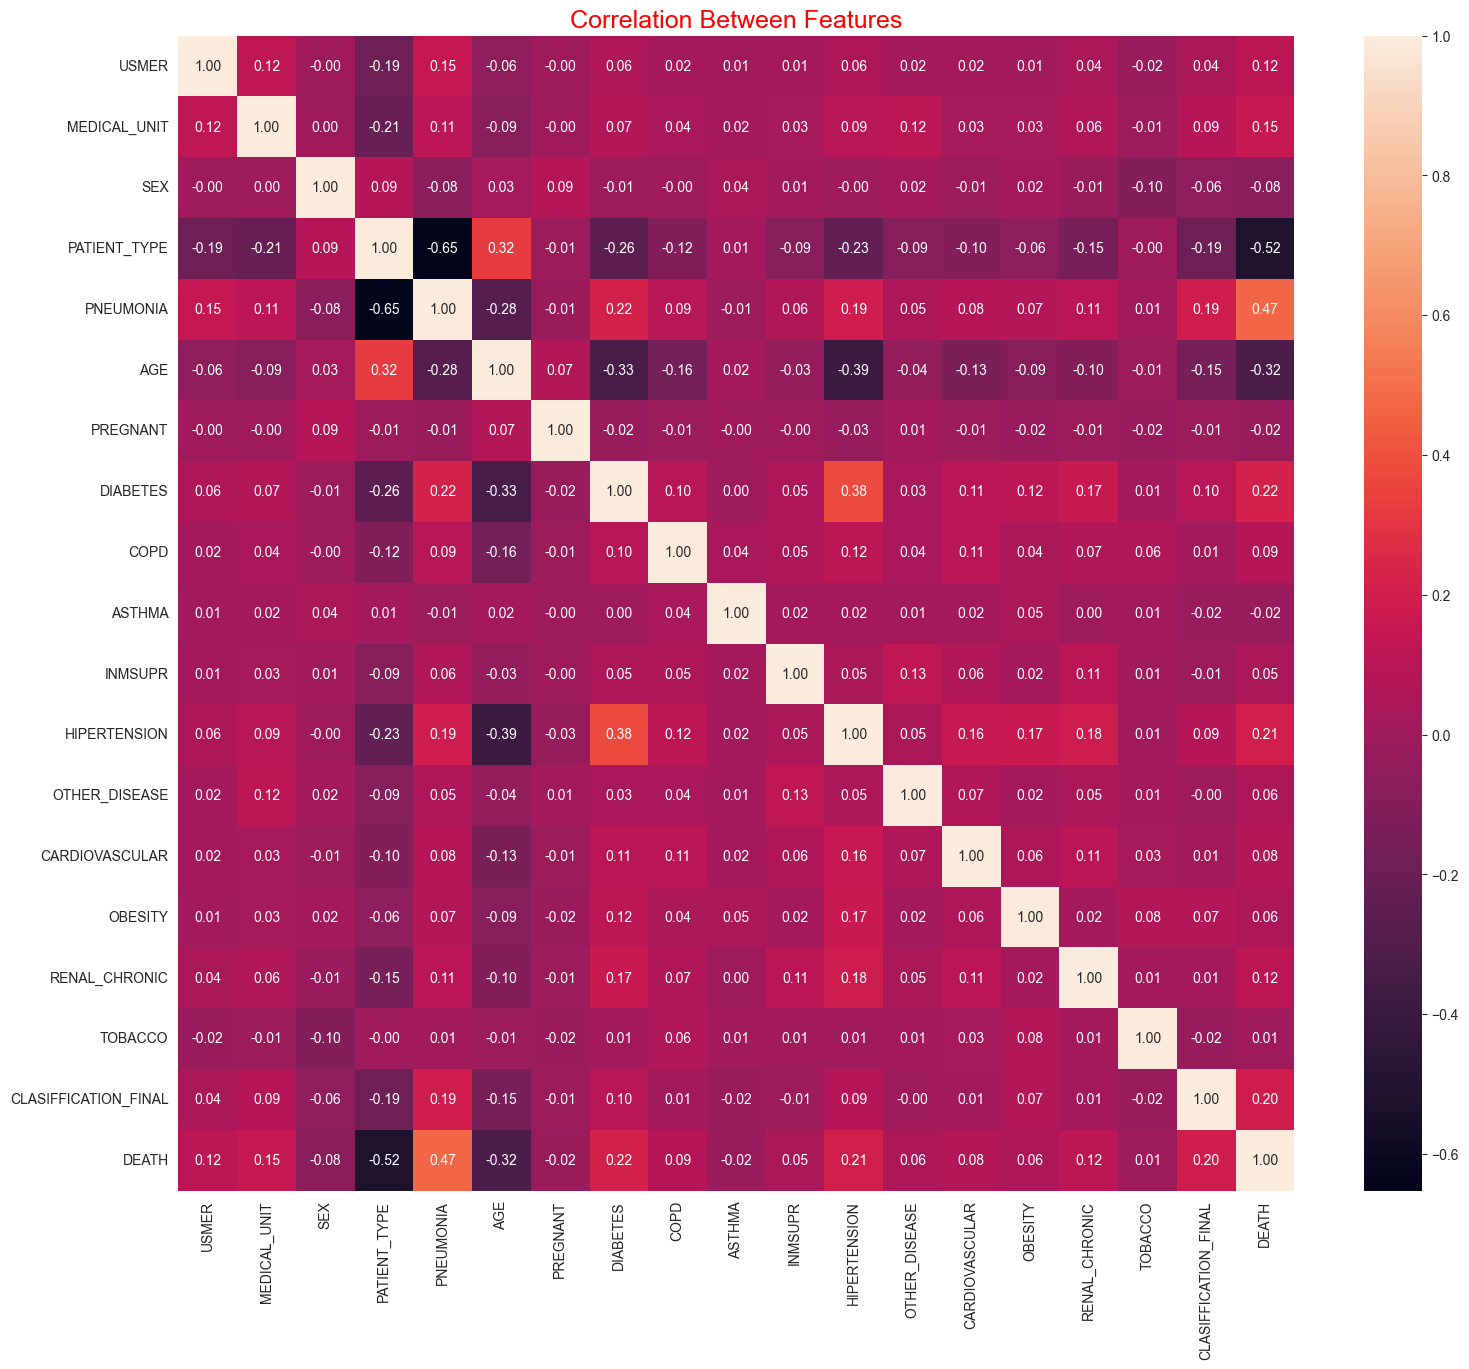

In [118]:
# 각 특성간 상관 관계(공분산)
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red")

# Future Selection

In [120]:
# DEATH랑 상관관계가 낮은 feature들은 삭제한다
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE",  "CARDIOVASCULAR","OBESITY","TOBACCO"]
df.drop(columns=unrelevant_columns, inplace=True)

In [121]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


In [122]:
# 이진데이터가 아닌 특성 가져오기
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [123]:
# scaling 하기
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1, 1))

In [124]:
x = df.drop(columns="DEATH") # 죽음 데이터 빼고 가져오기
y = df["DEATH"] # 죽음 데이터만 가져오기

# Train Test Split

In [125]:
# 훈련세트 분리하기
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (817581, 25)
Test_x : (204396, 25)
Train_y : (817581,)
Test_y : (204396,)


# Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x, train_y)
print("Logistic Regression Accuracy :", logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9394117301708448


In [127]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score :", f1_score(test_y, logreg.predict(test_x), average=None))

Logistic Regression F1 Score : [0.51973939 0.9676663 ]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

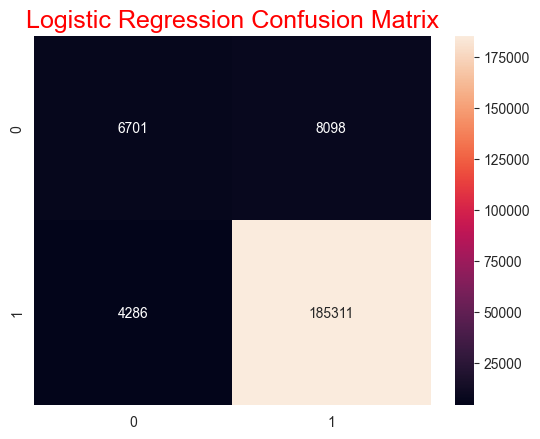

In [128]:
# 오차행렬, 1(긍정으로 예측)인데 1(긍정으로 결과가 나옴) 인 경우가 많다 -> 정확도가 높다.
# but, f1_score을 보면 죽은 환자에 대해서는 정확도가 낮다. 뷸균형 데이터 세트가 원인이다.
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red")

Text(0.5, 1.0, 'Death Distribution')

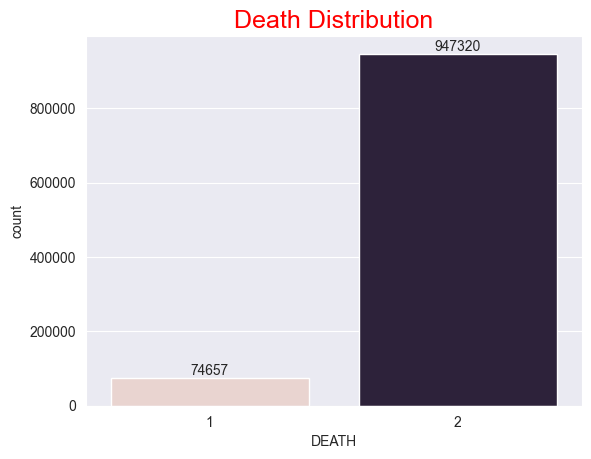

In [129]:
# 불균형 데이터 세트
# 생존자가 사망자보다 압도적으로 많다.

ax = sns.countplot(x=df.DEATH, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red")

# How To Solve Imbalance Dataset Problem

- 더 많은 데이터 세트를 가져온다
- 셈플링을 다시한다
- 알고리즘을 바꾼다
- 페털티 모델 등

In [132]:
# 과소표집 한다, 데이터의 수를 조정함(비슷한 비율이 되도록 삭제함)
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x,y)

Text(0.5, 1.0, 'Death Distribution')

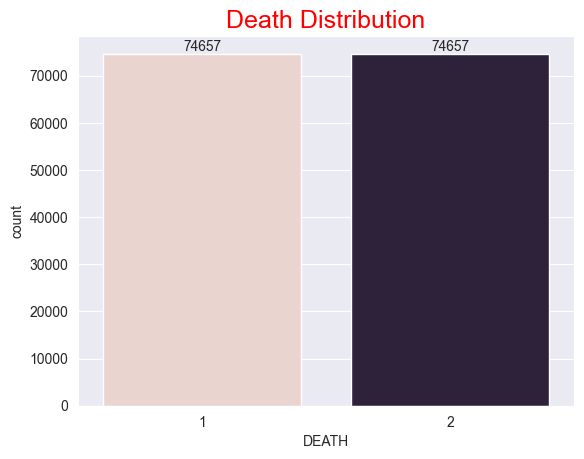

In [133]:
ax = sns.countplot(x=y_resampled, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red")

# Train Test Split After Undersampleing

In [134]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (119451, 25)
Test_x : (29863, 25)
Train_y : (119451,)
Test_y : (29863,)


# Logistic Regression After Undersampling

In [135]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9052339014834411


In [136]:
print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.90622929 0.90421715]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

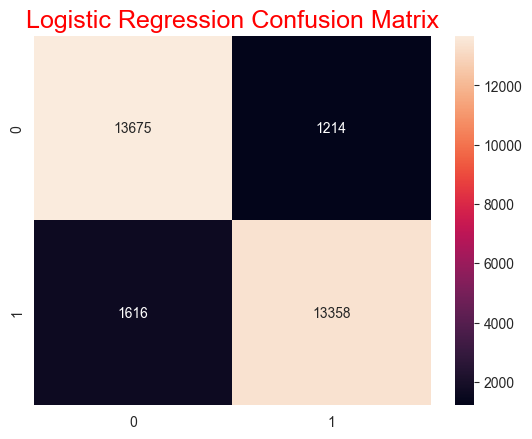

In [137]:
# undersampling으로 충분히 문제를 해결할 수 있었다.
# oversampling을 사용할 수 도 있지만 많은 과부하가 예상된다. -> 더 정확한 결과를 얻을 수 있다.

sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red")

# Logistic Regression Curve

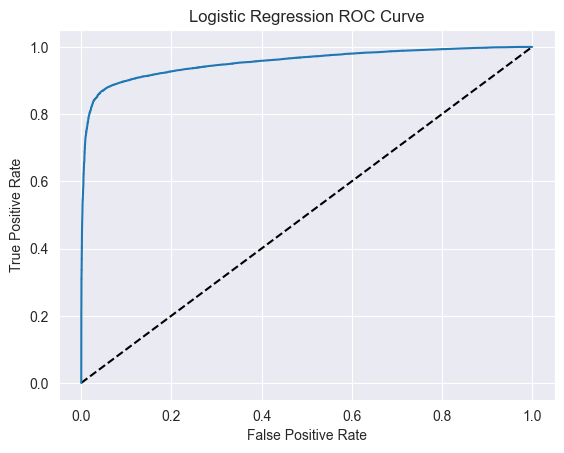

In [138]:
# 90%의 확률로 죽음을 예측할 수 있다.

from sklearn.metrics import roc_curve
test_y = test_y.replace({2:1,1:0})
# Probabilities
logreg_pred_proba = logreg.predict_proba(test_x)

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()